In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
# 웹에서 직접 불러오는 경우에 어떻게 처리할 것인가
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
red['type'] = 0
white['type'] = 1

wine = pd.concat([red,white])
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [5]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


In [6]:
wine['type'].value_counts()
# 답지 비율이 1:1정도까진 아니고 1:3

1    4898
0    1599
Name: type, dtype: int64

In [7]:
# 빈값은 없음
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [12]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


In [5]:
# normalize
# custom min-max scaler
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.469730,0.753886
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.145543,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,0.333333,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# sample 섞는 작업
# frac=1 전체 다 쓸꺼임
wine_shuffle = wine_norm.sample(frac=1)
# tensor 형태로 집어넣기 위해서 numpy 형태로 변환함(tensor쪽은 tensor나 numpy쪽으로 변혼이 필요함)
wine_np = wine_shuffle.to_numpy()


각각 처리해야하기 때문에 onehot encoding 형태로 변환해야함
feature가 아닌 target을 바꿔야함
tf.keras.utils.to_categorical -> one hot encoding,
scikit learn onehotencoding
간단하면 직접 lambda apply
3개이상이면 activation function을 softmax를 활용해야함

In [7]:
train_idx = int(len(wine_np))
train_x, train_y = wine_np[:train_idx,:-1], wine_np[:train_idx,-1]
test_x, test_y = wine_np[train_idx:,:-1], wine_np[train_idx:,-1]

train_y = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=2)


In [8]:
# model 설정

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    
    # 분류 모델이기 때문에 최종 단에 있어서는 softmax를 활용을 해야 함!!!!
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(train_x,train_y,epochs=25,batch_size=32,validation_split=0.25)

Train on 4872 samples, validate on 1625 samples
Epoch 1/25
4872/4872 [==============================] - 1s 193us/sample - loss: 0.0982 - accuracy: 0.9628 - val_loss: 0.0483 - val_accuracy: 0.9877
Epoch 2/25
4872/4872 [==============================] - 0s 45us/sample - loss: 0.0521 - accuracy: 0.9867 - val_loss: 0.1454 - val_accuracy: 0.9815
Epoch 3/25
4872/4872 [==============================] - 0s 50us/sample - loss: 0.0464 - accuracy: 0.9879 - val_loss: 0.0390 - val_accuracy: 0.9889
Epoch 4/25
4872/4872 [==============================] - 0s 49us/sample - loss: 0.0544 - accuracy: 0.9846 - val_loss: 0.0496 - val_accuracy: 0.9895
Epoch 5/25
4872/4872 [==============================] - 0s 49us/sample - loss: 0.0740 - accuracy: 0.9817 - val_loss: 0.0400 - val_accuracy: 0.9889
Epoch 6/25
4872/4872 [==============================] - 0s 50us/sample - loss: 0.0733 - accuracy: 0.9883 - val_loss: 0.0390 - val_accuracy: 0.9889
Epoch 7/25
4872/4872 [==============================] - 0s 48us/sampl

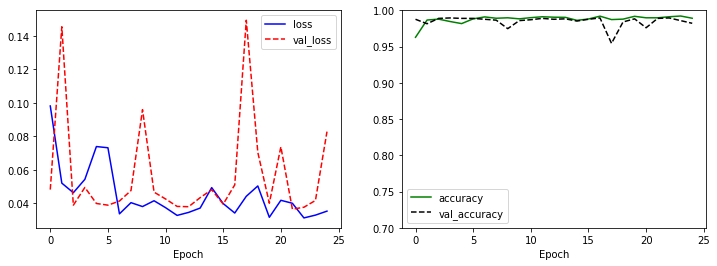

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import math

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
# model 평가

model.evaluate(test_x, test_y)

In [11]:
# 2진분류가 아닌 여러종류에 대해서 분류

wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

In [ ]:
del wine['quality']
# 기존 퀄리티 변경했으니 삭제

In [22]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_x, train_y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_x, test_y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_y = tf.keras.utils.to_categorical(train_y, num_classes=3)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=3)

In [16]:
len(wine.new_quality.value_counts())

3

In [17]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 192us/sample - loss: 0.4586 - accuracy: 0.8040 - val_loss: 0.4574 - val_accuracy: 0.7923
Epoch 2/25
3897/3897 [==============================] - ETA: 0s - loss: 0.4182 - accuracy: 0.80 - 0s 49us/sample - loss: 0.4165 - accuracy: 0.8075 - val_loss: 0.4311 - val_accuracy: 0.7938
Epoch 3/25
3897/3897 [==============================] - 0s 50us/sample - loss: 0.4054 - accuracy: 0.8147 - val_loss: 0.4183 - val_accuracy: 0.7923
Epoch 4/25
3897/3897 [==============================] - 0s 50us/sample - loss: 0.3999 - accuracy: 0.8096 - val_loss: 0.4109 - val_accuracy: 0.8177
Epoch 5/25
3897/3897 [==============================] - 0s 50us/sample - loss: 0.4008 - accuracy: 0.8088 - val_loss: 0.4069 - val_accuracy: 0.7923
Epoch 6/25
3897/3897 [==============================] - 0s 50us/sample - loss: 0.4083 - accuracy: 0.8083 - val_loss: 0.4039 - val_accuracy: 0.8092
Epoch 7/25
3897/3897 [=====

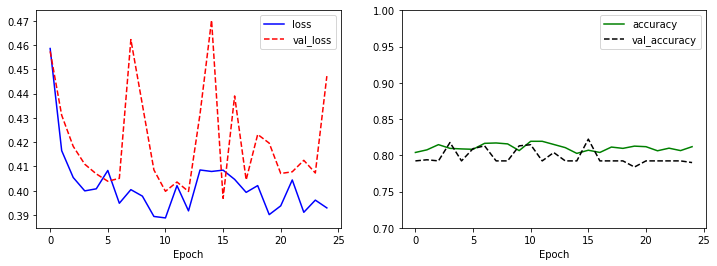

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [24]:
model.evaluate(test_x,test_y)

1300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.43434299267255344, 0.81153846]

In [23]:
test_x.shape, test_y.shape

((1300, 12), (1300, 3))

# fasion mnist

In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [27]:
# data normalize
train_X = train_X / 255.0
test_X = test_X / 255.0

In [28]:
# modeling
model = tf.keras.Sequential([
    # 2차원 데이터를 1차원데이터로 변경 Flatten
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 3s 71us/sample - loss: 0.5208 - accuracy: 0.8167 - val_loss: 0.4144 - val_accuracy: 0.8526
Epoch 2/25
45000/45000 [==============================] - 3s 73us/sample - loss: 0.3878 - accuracy: 0.8616 - val_loss: 0.3882 - val_accuracy: 0.8598
Epoch 3/25
45000/45000 [==============================] - 2s 38us/sample - loss: 0.3467 - accuracy: 0.8741 - val_loss: 0.3538 - val_accuracy: 0.8719
Epoch 4/25
45000/45000 [==============================] - 2s 38us/sample - loss: 0.3218 - accuracy: 0.8820 - val_loss: 0.3505 - val_accuracy: 0.8751
Epoch 5/25
45000/45000 [==============================] - 2s 40us/sample - loss: 0.3028 - accuracy: 0.8896 - val_loss: 0.3285 - val_accuracy: 0.8829
Epoch 6/25
45000/45000 [==============================] - 2s 38us/sample - loss: 0.2864 - accuracy: 0.8935 - val_loss: 0.3187 - val_accuracy: 0.8845
Epoch 7/25
45000/45000 [==============================] 

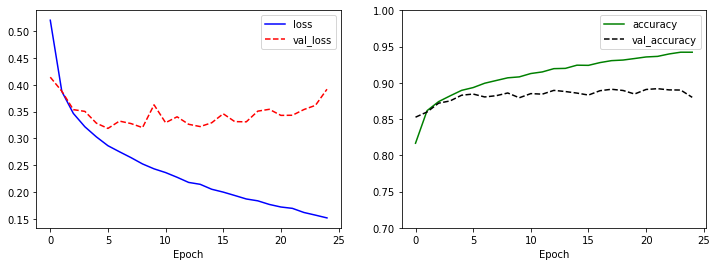

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [31]:
model.evaluate(test_X, test_Y)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4201074151337147, 0.8762]